In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [12]:


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in columns
pd.set_option('display.width',1000)

#reading the file
df=pd.read_csv('D:\PYTHON\Project\Datas\Dataset.csv')


Data Cleaning

In [19]:


#removing duiplicates by keeping first occurence
df.drop_duplicates(subset=['title'],keep='first',inplace=True)

#removing row which is not a url
df=df[df['url'].str.startswith('https')]

df.reset_index(drop=True,inplace=True)
df.replace("\n","",regex=True,inplace=True) #removing \n

df['authors']=df['authors'].replace('[]','Unknown')
df['authors']=df['authors'].apply(lambda x:str(x))
df['authors']=df['authors'].apply(lambda x:x[2:len(x)-2] if x!='Unknown' else x)

df['timestamp']=df['timestamp'].apply(lambda x:str(x))
df['Date']=df['timestamp'].str.split(' ').str[0] #seperating date
df['Date']=pd.to_datetime(df['Date']).dt.date #converting to date format 
df['Time']=df['timestamp'].str.split(' ').str[1].str.split('.').str[0].str.split('+').str[0] #seperating time
df['Time']=pd.to_datetime(df['Time']).dt.time #converting to time format

df['title']=df['title'].astype(str)#convert to string
df['text']=df['text'].astype(str)#convert to string
df['tags'] = df['tags'].apply(lambda x:str(x)) # Converts string to list

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18388\3834637361.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time']).dt.time #converting to time format


EDA

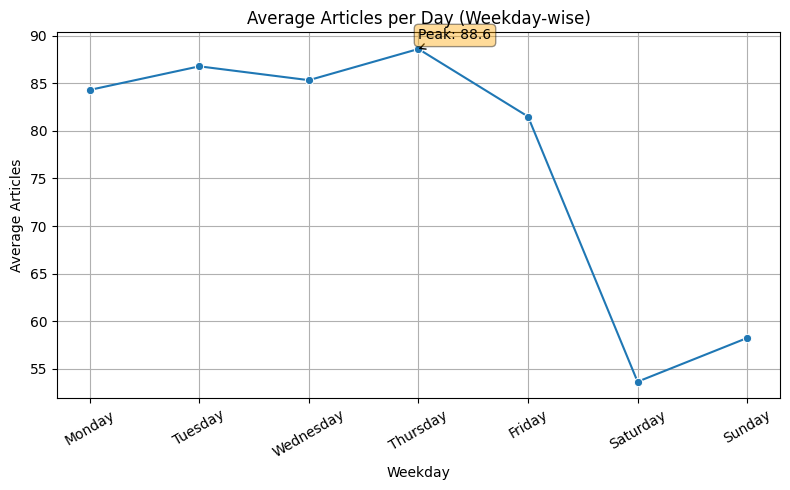

In [14]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Extract components
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

# ----------- Monthly-wise: Jan, Feb, Mar, Apr -------------
months_of_interest = ['January', 'February', 'March', 'April']
df_months = df[df['Month'].isin(months_of_interest)]

monthly_counts = df_months.groupby(['Month', 'Date']).size().reset_index(name='Count')
monthly_avg = monthly_counts.groupby('Month')['Count'].mean().reindex(months_of_interest).reset_index()



# ----------- Weekday-wise Plot -------------
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df.groupby(['Weekday', 'Date']).size().reset_index(name='Count')
weekday_avg = weekday_counts.groupby('Weekday')['Count'].mean().reindex(weekday_order).reset_index()

# Plot weekday line chart
plt.figure(figsize=(8, 5))
sns.lineplot(data=weekday_avg, x='Weekday', y='Count', marker='o')

# Annotate peak
peak_day = weekday_avg.loc[weekday_avg['Count'].idxmax()]
plt.annotate(f"Peak: {peak_day['Count']:.1f}",
             xy=(peak_day['Weekday'], peak_day['Count']),
             xytext=(peak_day['Weekday'], peak_day['Count'] + 1),
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle="round", fc="orange", alpha=0.4))

plt.title("Average Articles per Day (Weekday-wise)")
plt.ylabel("Average Articles")
plt.xlabel("Weekday")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


d:\PYTHON\venv1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


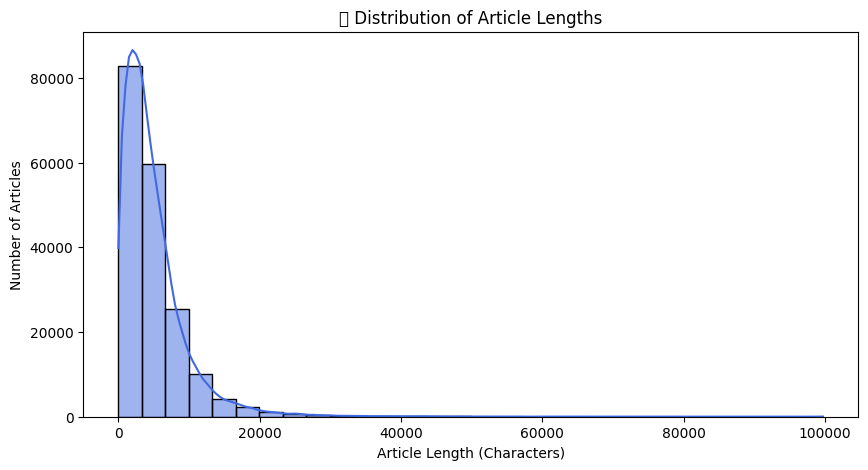

In [15]:
df["article_length"] = df["text"].str.len()

plt.figure(figsize=(10, 5))
sns.histplot(df["article_length"], bins=30, kde=True, color="royalblue")
plt.xlabel("Article Length (Characters)")
plt.ylabel("Number of Articles")
plt.title("⏳ Distribution of Article Lengths")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18388\1187038686.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_df["Count"], y=tag_df["Tag"], palette="magma")


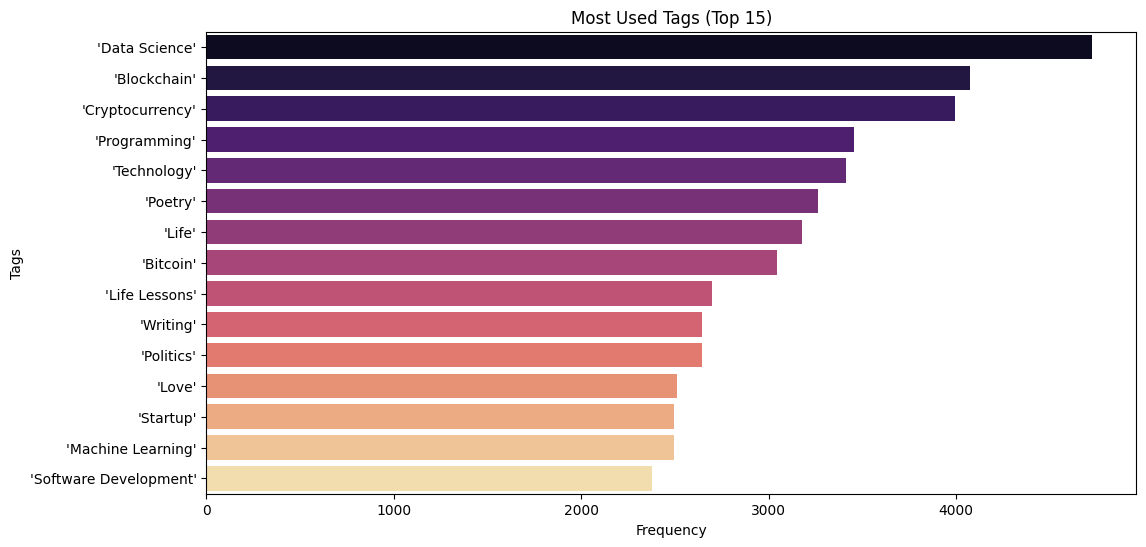

In [16]:

# Flatten tag list
all_tags = df["tags"].dropna().str.split(", ")
flat_tags = [tag for sublist in all_tags for tag in sublist]
tag_counts = Counter(flat_tags)

# Convert to DataFrame
tag_df = pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]).sort_values(by="Count", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=tag_df["Count"], y=tag_df["Tag"], palette="magma")
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.title("Most Used Tags (Top 15)")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18388\3140833399.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\PYTHON\venv1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


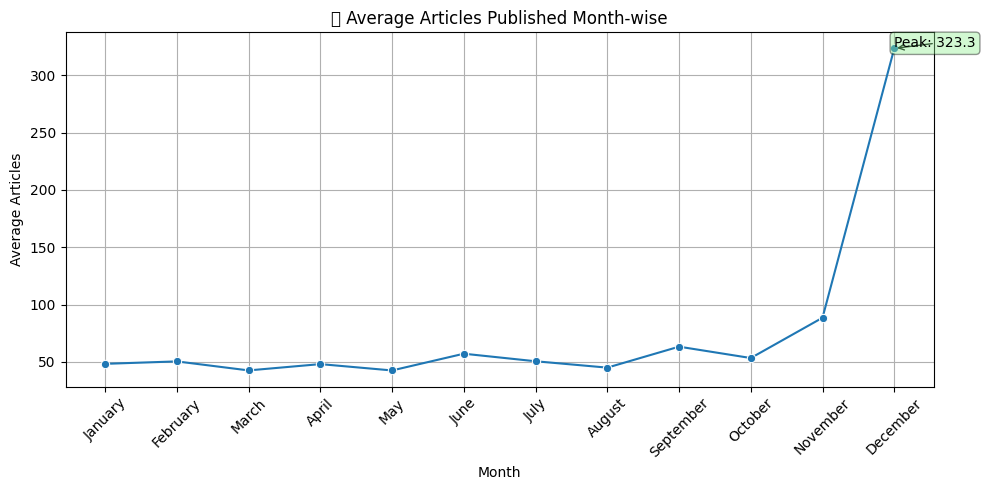

In [18]:
# Convert timestamp to datetime using 'infer_datetime_format'
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', utc=True)

# Drop rows with invalid timestamp
df = df.dropna(subset=['timestamp'])

# Extract Date and Month info
df['Date'] = df['timestamp'].dt.date
df['Month'] = df['timestamp'].dt.month_name()
df['Month_Num'] = df['timestamp'].dt.month

# Group by month and date to count articles per day, then average per month
monthly_counts = df.groupby(['Month_Num', 'Month', 'Date']).size().reset_index(name='Count')
monthly_avg = monthly_counts.groupby(['Month_Num', 'Month'])['Count'].mean().reset_index()
monthly_avg = monthly_avg.sort_values('Month_Num')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month', y='Count', marker='o')

# Annotate peak month
peak = monthly_avg.loc[monthly_avg['Count'].idxmax()]
plt.annotate(f"Peak: {peak['Count']:.1f}",
             xy=(peak['Month'], peak['Count']),
             xytext=(peak['Month'], peak['Count'] + 1),
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle="round", fc="lightgreen", alpha=0.4))

# Final touches
plt.title("📈 Average Articles Published Month-wise")
plt.xlabel("Month")
plt.ylabel("Average Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
